# Business Understanding

Companies are always looking for feedback on their products from their customers. The ability to constantly understand the customer is a major part of a company's business plan. Twitter is excellent source for feedback on products and services. By understanding what users are saying about products and services, companies like Apple and Google can develop targeted Marketing Strategies to boost sales.

One of the best ways to gather this kind of information is focus on feedback from technology showcases like South by Southwest (SXSW). The data we will be using for this project is from the 2011 SXSW festival.

In [781]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [782]:
df = pd.read_csv('../../data/judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [783]:
df = df.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'})
df.head() #Sanity Check

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [784]:
print(df.info())
print(("-"*20))
print(df.duplicated().sum())
print(("-"*20))
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      9092 non-null   object
 1   Product    3291 non-null   object
 2   Sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None
--------------------
22
--------------------
Tweet           1
Product      5802
Sentiment       0
dtype: int64


A lot of missing values in the product column. Maybe go through and find key words to fill in some values?

In [785]:
df['Sentiment'].value_counts() 

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Sentiment, dtype: int64

A lot of No emotions or Neutral values. And very imbalanced classes.

In [786]:
df['Product'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: Product, dtype: int64

Should we group these categories into Apple and Google?

In [787]:
df.Tweet.dropna(inplace=True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [788]:
df.drop_duplicates(inplace=True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [789]:
df.drop([6, 9092], inplace=True)

In [790]:
df.reset_index(inplace=True)
df.drop(columns="index", inplace = True)

In [791]:
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9064,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9065,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9066,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9067,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product


In [792]:
print(df.isna().sum())

Tweet           0
Product      5787
Sentiment       0
dtype: int64


In [793]:
df.Product.fillna("Undefined", inplace = True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9064,"@mention Yup, but I don't have a third app yet...",Undefined,No emotion toward brand or product
9065,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9066,"Wave, buzz... RT @mention We interrupt your re...",Undefined,No emotion toward brand or product
9067,"Google's Zeiger, a physician never reported po...",Undefined,No emotion toward brand or product


(array([ 296.,  469.,  945.,  428., 5787.,   77.,  659.,   80.,  293.,
          35.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

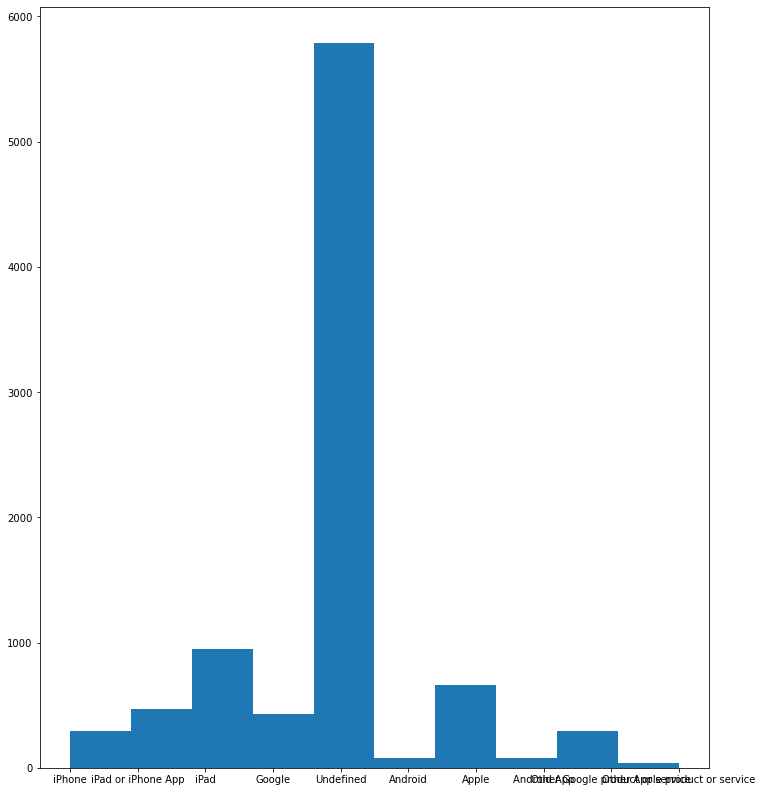

In [794]:
fig, ax = plt.subplots(figsize=(12,14))
plt.hist(df["Product"])

In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      9069 non-null   object
 1   Product    9069 non-null   object
 2   Sentiment  9069 non-null   object
dtypes: object(3)
memory usage: 212.7+ KB


In [796]:
df["Product"].astype(str)

0                   iPhone
1       iPad or iPhone App
2                     iPad
3       iPad or iPhone App
4                   Google
               ...        
9064             Undefined
9065                  iPad
9066             Undefined
9067             Undefined
9068             Undefined
Name: Product, Length: 9069, dtype: object

In [797]:
def find_brand(Product, Tweet): #Building function to determine Brand
    brand = 'Undetermined' #Labeling brand as Undetermined
    if ((Product.lower().__contains__('google')) or (Product.lower().__contains__('android'))): #Labeling Google
        brand = 'Google' #Unless tweet contains google or android
    elif ((Product.lower().__contains__('apple')) or (Product.lower().__contains__('ip'))): #Labeling Apple
        brand = 'Apple' #Unless tweet contains apple or ip
    
    if (brand == 'Undetermined'): 
        lower_tweet = Tweet.lower() #Making tweet lowercase
        is_google = (lower_tweet.__contains__('google')) or (lower_tweet.__contains__('android')) #Undetermined google
        is_apple = (lower_tweet.__contains__('apple')) or (lower_tweet.__contains__('ip')) #Undetermined apple
        
        if (is_google and is_apple): #if it has both identifiers in the tweet
            brand = 'Both' #Labeling brand as both
        elif (is_google):
            brand = 'Google' #Labeling brand as Google
        elif (is_apple):
            brand = 'Apple' #Labeling brand as Apple
    
    return brand

df['Brand'] = df.apply(lambda x: find_brand(x['Product'], x['Tweet']), axis = 1) #Applying function to column
df['Brand'].value_counts() #Reviewing value counts of each class within brand

Apple           5361
Google          2756
Undetermined     739
Both             213
Name: Brand, dtype: int64

In [798]:
df

,Tweet,Product,Sentiment,Brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google
...,...,...,...,...
9064,"@mention Yup, but I don't have a third app yet...",Undefined,No emotion toward brand or product,Google
9065,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Apple
9066,"Wave, buzz... RT @mention We interrupt your re...",Undefined,No emotion toward brand or product,Google
9067,"Google's Zeiger, a physician never reported po...",Undefined,No emotion toward brand or product,Google


<AxesSubplot:xlabel='Brand', ylabel='Count'>

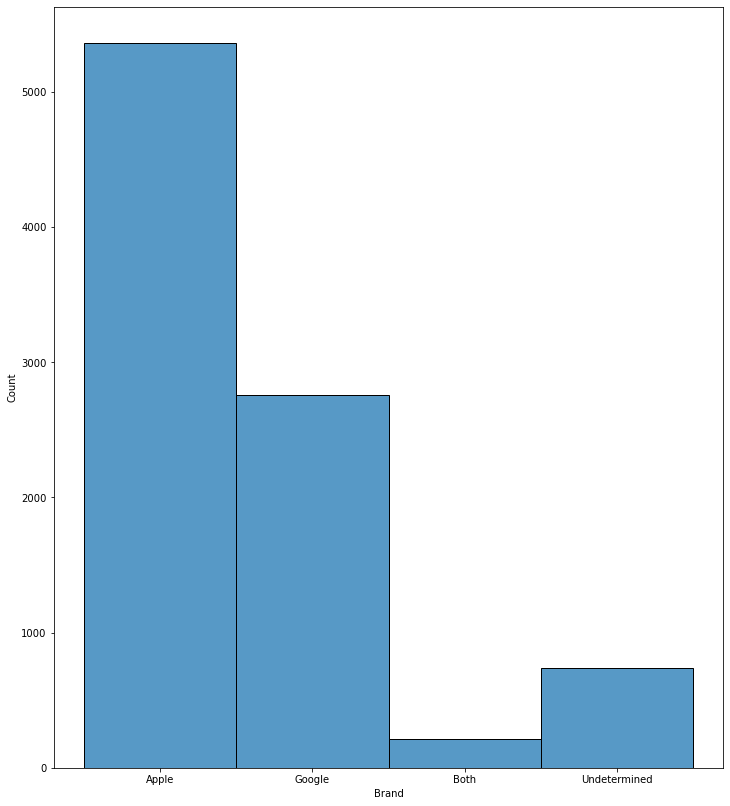

In [799]:
fig, ax = plt.subplots(figsize=(12,14))
sns.histplot(df["Brand"])

<AxesSubplot:xlabel='Brand', ylabel='count'>

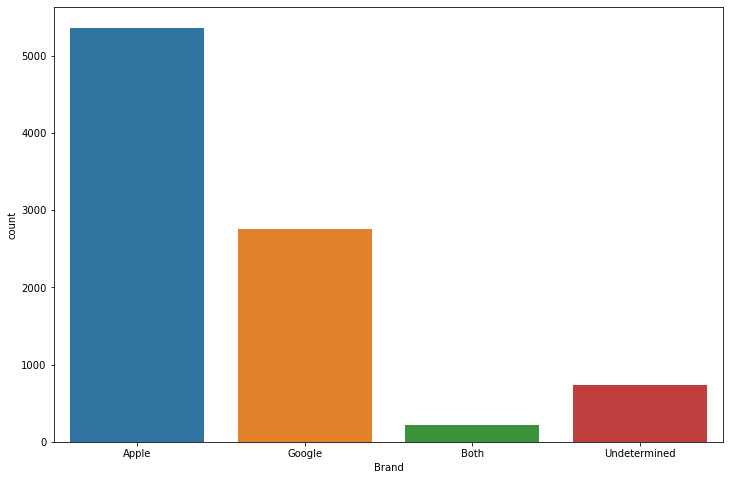

In [800]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x="Brand")

[Text(0, 0, 'iPhone'),
 Text(1, 0, 'iPad or iPhone App'),
 Text(2, 0, 'iPad'),
 Text(3, 0, 'Google'),
 Text(4, 0, 'Undefined'),
 Text(5, 0, 'Android'),
 Text(6, 0, 'Apple'),
 Text(7, 0, 'Android App'),
 Text(8, 0, 'Other Google product or service'),
 Text(9, 0, 'Other Apple product or service')]

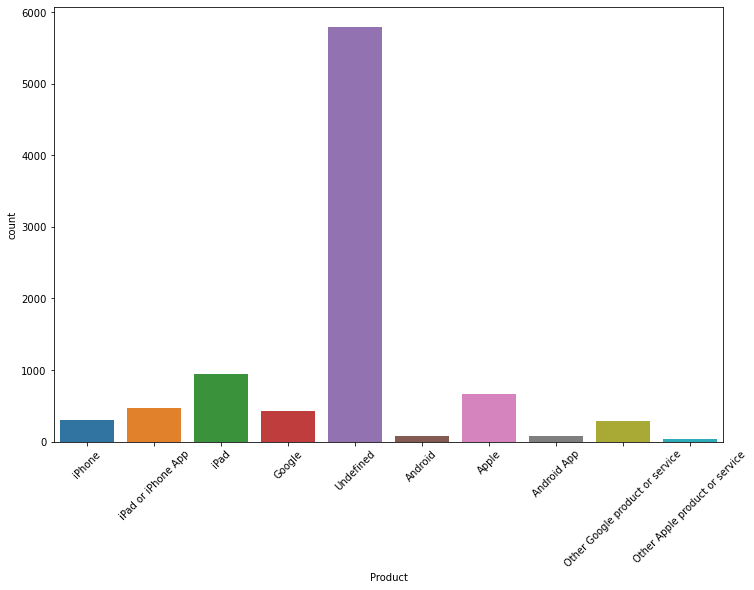

In [801]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x="Product")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

[Text(0, 0, 'Negative emotion'),
 Text(1, 0, 'Positive emotion'),
 Text(2, 0, 'No emotion toward brand or product'),
 Text(3, 0, "I can't tell")]

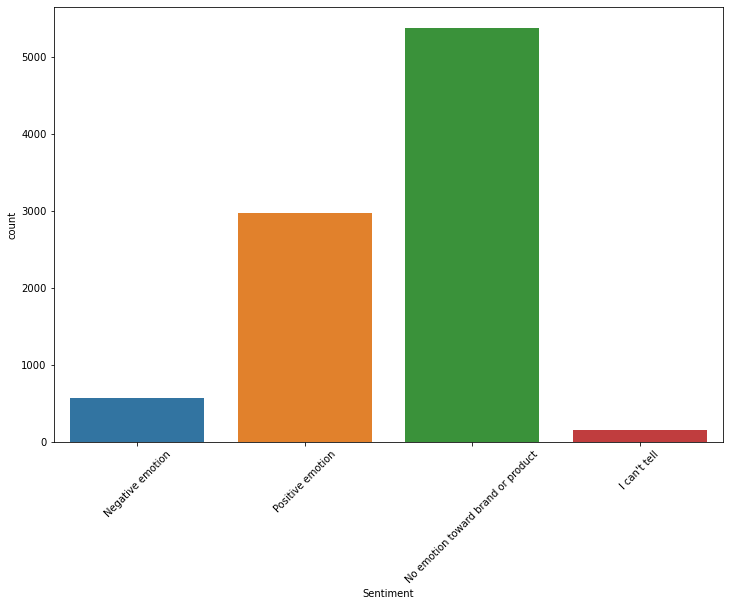

In [802]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x="Sentiment")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

[Text(0, 0, 'Apple'),
 Text(1, 0, 'Google'),
 Text(2, 0, 'Both'),
 Text(3, 0, 'Undetermined')]

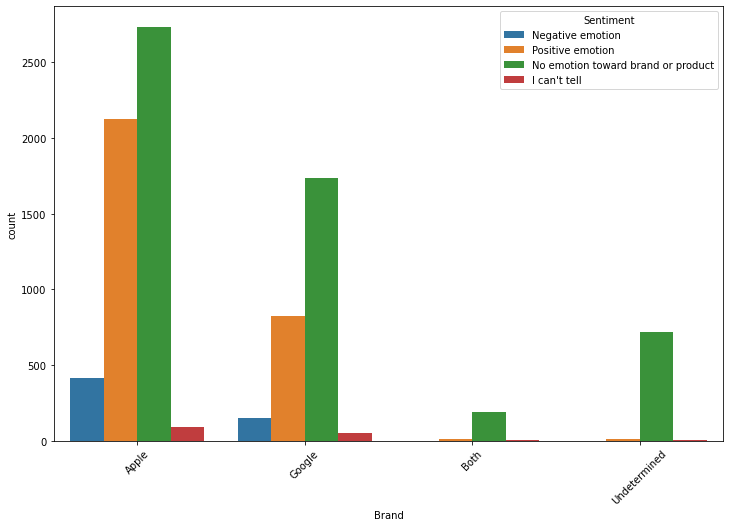

In [803]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x="Brand", hue = "Sentiment")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

[Text(0, 0, 'Negative emotion'),
 Text(1, 0, 'Positive emotion'),
 Text(2, 0, 'No emotion toward brand or product'),
 Text(3, 0, "I can't tell")]

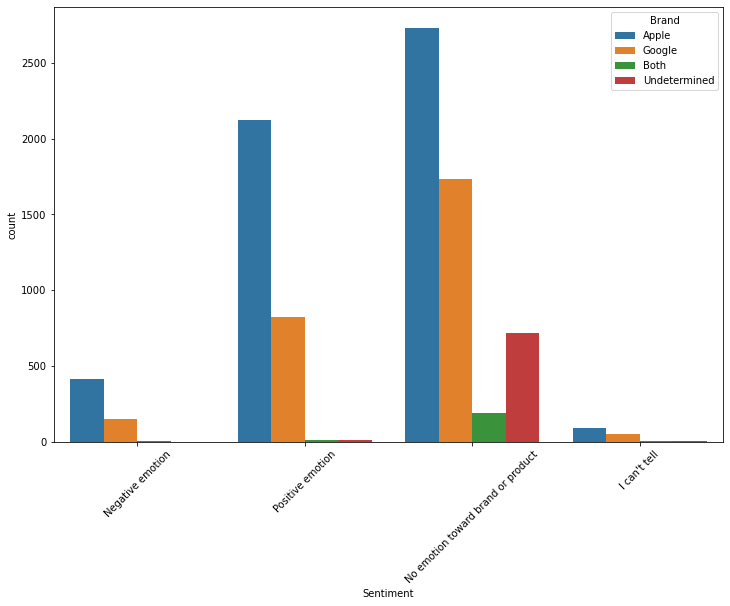

In [804]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x="Sentiment", hue = "Brand")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

In [805]:
grouped = df.groupby(["Brand", "Sentiment"]).count()

In [806]:
grouped

Tweet  Product
Brand        Sentiment                                         
Apple        I can't tell                           93       93
             Negative emotion                      415      415
             No emotion toward brand or product   2730     2730
             Positive emotion                     2123     2123
Both         I can't tell                            7        7
             Negative emotion                        3        3
             No emotion toward brand or product    192      192
             Positive emotion                       11       11
Google       I can't tell                           50       50
             Negative emotion                      150      150
             No emotion toward brand or product   1733     1733
             Positive emotion                      823      823
Undetermined I can't tell                            6        6
             Negative emotion                        1        1
             No emotion toward brand or product    719      719
             Positive emotion                       13       13

In [807]:
display(df.groupby(['Sentiment'])['Brand'].value_counts(normalize = True))
print("-"*60)
display(df.groupby(['Brand'])['Sentiment'].value_counts(normalize = True))

Sentiment                           Brand       
I can't tell                        Apple           0.596154
                                    Google          0.320513
                                    Both            0.044872
                                    Undetermined    0.038462
Negative emotion                    Apple           0.729350
                                    Google          0.263620
                                    Both            0.005272
                                    Undetermined    0.001757
No emotion toward brand or product  Apple           0.508001
                                    Google          0.322479
                                    Undetermined    0.133792
                                    Both            0.035728
Positive emotion                    Apple           0.714815
                                    Google          0.277104
                                    Undetermined    0.004377
                                    

------------------------------------------------------------


Brand         Sentiment                         
Apple         No emotion toward brand or product    0.509233
              Positive emotion                      0.396008
              Negative emotion                      0.077411
              I can't tell                          0.017348
Both          No emotion toward brand or product    0.901408
              Positive emotion                      0.051643
              I can't tell                          0.032864
              Negative emotion                      0.014085
Google        No emotion toward brand or product    0.628810
              Positive emotion                      0.298621
              Negative emotion                      0.054427
              I can't tell                          0.018142
Undetermined  No emotion toward brand or product    0.972936
              Positive emotion                      0.017591
              I can't tell                          0.008119
              Negative emotion      

In [818]:
cleaned = df.copy()

In [819]:
cleaned = cleaned[cleaned["Product"].str.contains("Undefined")==False].reset_index()

In [820]:
cleaned

,index,Tweet,Product,Sentiment,Brand
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google
...,...,...,...,...,...
3277,9054,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion,Apple
3278,9056,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion,Apple
3279,9057,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion,Google
3280,9062,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion,Apple


In [821]:
cleaned = cleaned[cleaned["Sentiment"].str.contains("No emotion toward brand or product|I can't tell")==False].reset_index()

In [822]:
cleaned

,level_0,index,Tweet,Product,Sentiment,Brand
0,0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
1,1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
3,3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google
...,...,...,...,...,...,...
3177,3277,9054,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion,Apple
3178,3278,9056,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion,Apple
3179,3279,9057,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion,Google
3180,3280,9062,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion,Apple


In [823]:
cleaned = cleaned.drop("index", axis =1)

In [824]:
cleaned["Product"].value_counts()

iPad                               917
Apple                              636
iPad or iPhone App                 459
Google                             412
iPhone                             286
Other Google product or service    283
Android App                         79
Android                             76
Other Apple product or service      34
Name: Product, dtype: int64

In [825]:
cleaned["Sentiment"].value_counts()

Positive emotion    2664
Negative emotion     518
Name: Sentiment, dtype: int64

In [826]:
cleaned["Brand"].value_counts()

Apple     2332
Google     850
Name: Brand, dtype: int64

<AxesSubplot:xlabel='Brand', ylabel='Count'>

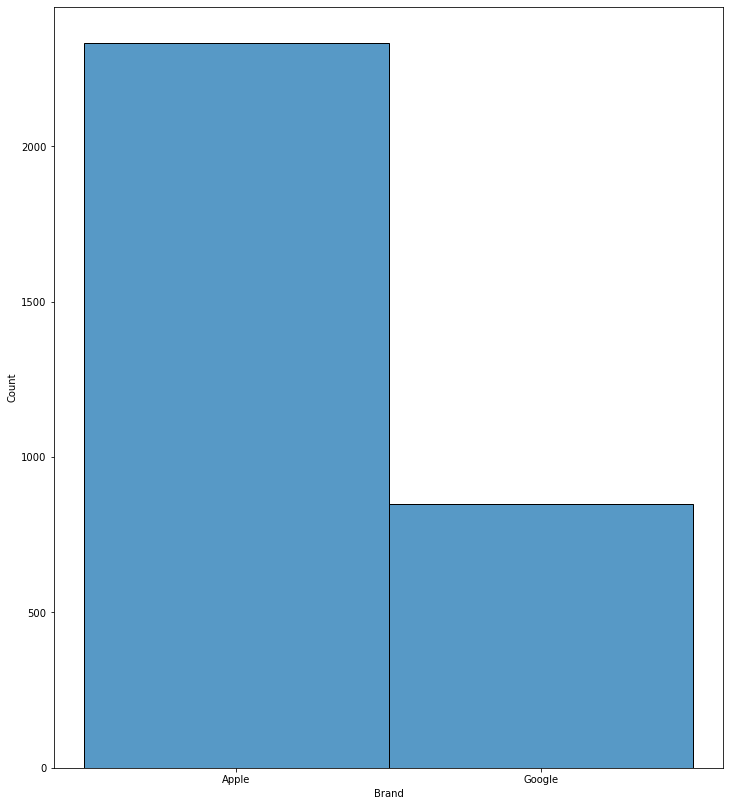

In [827]:
fig, ax = plt.subplots(figsize=(12,14))
sns.histplot(cleaned["Brand"])

<AxesSubplot:xlabel='Brand', ylabel='count'>

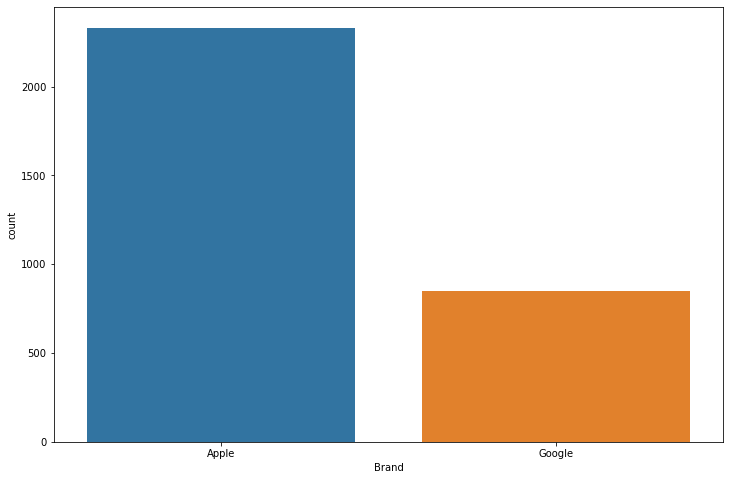

In [828]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = cleaned, x="Brand")

[Text(0, 0, 'iPhone'),
 Text(1, 0, 'iPad or iPhone App'),
 Text(2, 0, 'iPad'),
 Text(3, 0, 'Google'),
 Text(4, 0, 'Android'),
 Text(5, 0, 'Apple'),
 Text(6, 0, 'Android App'),
 Text(7, 0, 'Other Google product or service'),
 Text(8, 0, 'Other Apple product or service')]

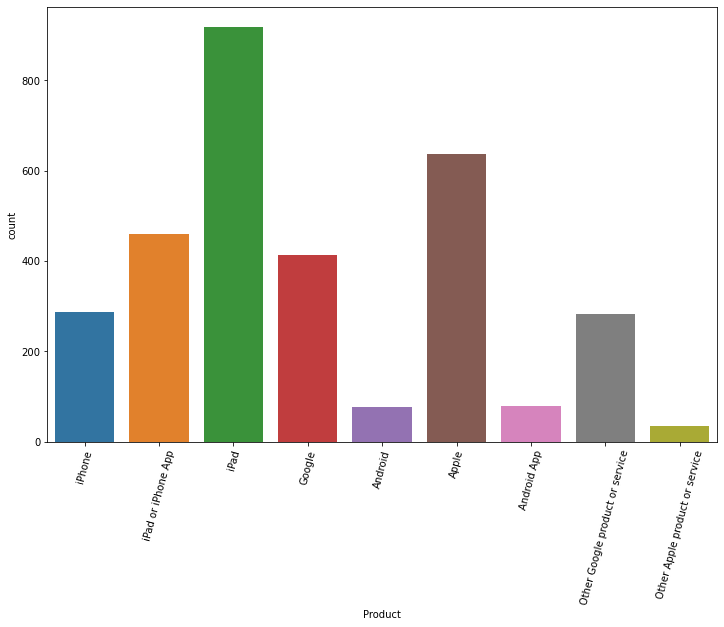

In [836]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = cleaned, x="Product")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 75)

[Text(0, 0, 'Negative emotion'), Text(1, 0, 'Positive emotion')]

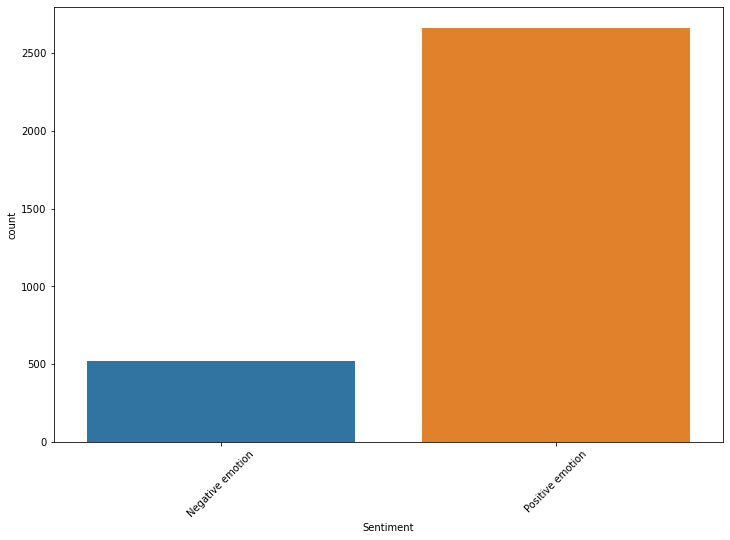

In [830]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = cleaned, x="Sentiment")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

[Text(0, 0, 'Apple'), Text(1, 0, 'Google')]

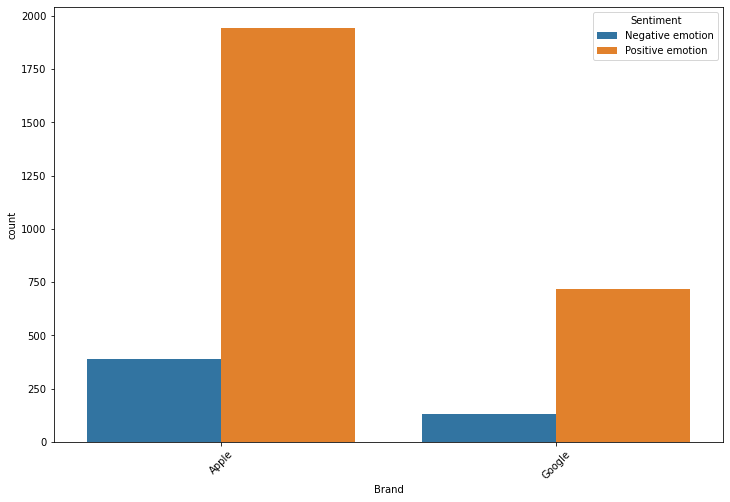

In [831]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = cleaned, x="Brand", hue = "Sentiment")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

[Text(0, 0, 'Negative emotion'), Text(1, 0, 'Positive emotion')]

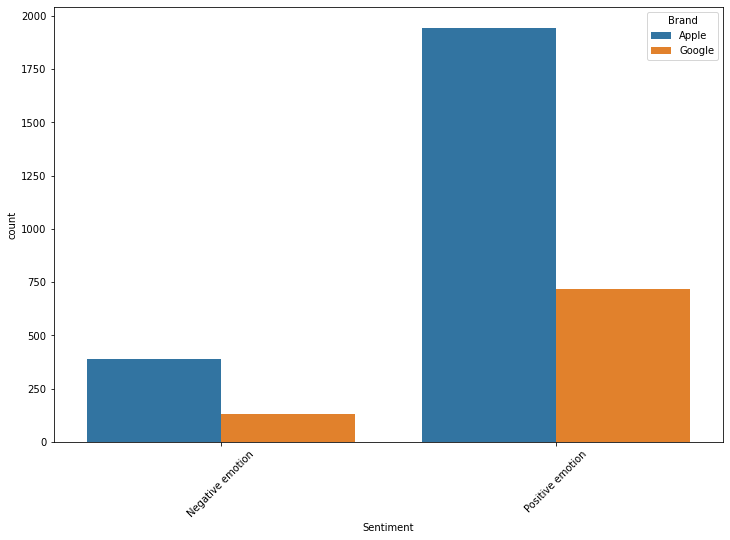

In [832]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = cleaned, x="Sentiment", hue = "Brand")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

In [835]:
display(cleaned.groupby(['Brand'])['Sentiment'].value_counts(normalize = True))
print("-"*60)
display(cleaned.groupby(['Sentiment'])['Brand'].value_counts(normalize = True))

Brand   Sentiment       
Apple   Positive emotion    0.834048
        Negative emotion    0.165952
Google  Positive emotion    0.845882
        Negative emotion    0.154118
Name: Sentiment, dtype: float64

------------------------------------------------------------


Sentiment         Brand 
Negative emotion  Apple     0.747104
                  Google    0.252896
Positive emotion  Apple     0.730105
                  Google    0.269895
Name: Brand, dtype: float64

In [ ]:
import re

In [29]:
df['Hashtag'] = df['Tweet'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))